In [1]:
from p07 import *

In [2]:
img_dim = 100

یک تصویر انتخاب شده.
شبکه ای دو لایه ساختم به علاوه ی یک لایه ورودی.
یک تصویر انتخاب کردم که به عنوان ورودی به شبکه داده می‌شود و ازمایش ها روی ان انجام میشود.
لایه ورودی
layer1
تصویر را به صورت کدینگ حاصل از روش 
ttfs
دریافت می‌کند و در این لایه به صورت فورس اسپایک قرار داده میشود.
ولتاژ این اسپایک ها با فیلتری که به عنوان کرنل انتخاب شده کانولوشن گرفته میشود و روی لایه اول شبکه 
layer2
اسپایک ها نشان دهنده ی فعالیتی است که از لایه ورودی کتنولوشن گرفته شده.
این اسپایک ها به لایه سوم فرستاده میشود.
روی لایه سوم که همان پولینگ انجام میشود.
لایه های ورودی و اول به ترتیب برابر ظول و عرض برابر تصویر ورودی دارند. 
لایه اخر پولینگ را با اندازه ی داده شده انجام میدهد و اندازه ی این لایه برای ازمایش های زیر متفاوت است.
در مجموع 4 ازمایش انجام شده.
دو تا از کرنل های تمرین قبلی و اندازه ی 
stride , pooling
به عنوان پارامتر در هر مورد تغیر کرده اند.

## original image 

original image:


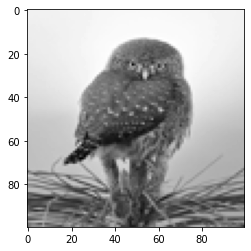

In [3]:
img_size = (img_dim, img_dim)
img = Image.open('image2.jpg')
img_tensor = torch.tensor(np.asarray(img.convert('RGB').convert('L').resize(img_size)))

print('original image:')
plt.imshow(img_tensor, cmap='gray')
plt.show()

 پارامترهایی که در فیلترهای استفاده شده به عنوان کرنل به کار میروند. 

In [4]:
par = {
    'std1' : 1,
    'std2' : 5,
    'filter_size' : 15,
    'min_val' : 0,
    'max_val' : 255,
    'time' : 50,
    'dt' : 1,
    'l' : 3,
    'theta' : 0,
    'sigma' : 3,
    'gamma' : 10   
}

خارج از جریان گزارش و شبکه تصویر های فیلتر شده در زیر اورده شده است.

## filtered image
### DoG(std1 = 1 , std2 = 5 , filter_size = 15)

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\torch\functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


on-center filter : 


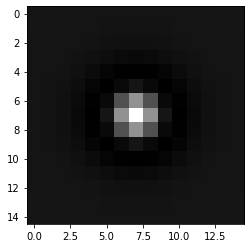

on-center-filtered image: 


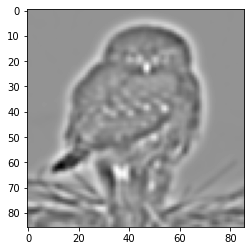

In [5]:
DoG_filter = DoG(par['std1'], par['std2'], par['filter_size'])

DoG_result_on_c = convolve(img_tensor, DoG_filter, 'on-center')
show_with_filter(DoG_result_on_c, DoG_filter, 'on-center')

## filtered image
### Gabor(lambda = 3 , theta = 0 , sigma = 3 , gamma = 10 , filter_size = 15)

on-center filter : 


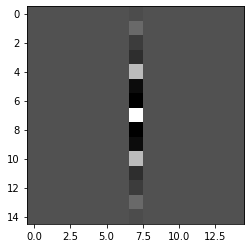

on-center-filtered image: 


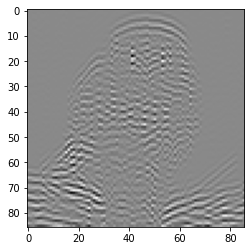

In [6]:
gabor_filter = gabor(par['l'], par['theta'], par['sigma'], par['gamma'], par['filter_size'])

gabor_result_on_c = convolve(img_tensor, gabor_filter, 'on-center')
show_with_filter(gabor_result_on_c, gabor_filter, 'on-center')

## network
### 3 layers : input, convolution, pooling

برای هر مجموعه پارامتر شبکه، اول دو نمودار ولتاژ نورون های لایه اول و دوم آمده و بعد نمودار میانگین ولتاژ آن لایه ها و سپس نمودار رستر دوبعدی سه لایه یعنی دولایه اصلی و لایه ورودی آورده شده.
پارامترهای اولیه ی شبکه را در زیر اورده ام.
بعد از آن نمودارهای سه بعدی از فعالیت نورون ها در طول زمان آورده شده.
به ترتیب برای لایه ورودی و لایه اول کانولوشن و لایه ی دوم پولینگ

In [7]:
param_set ={
    'density' : ('random' , 0.1),
    'Iterations' : par['time'],
    'img_dim' : img_dim,
    
    'layer1_size' : img_dim,
    'layer2_size' : img_dim,
    'layer3_size' : img_dim//2,
    
    'layer1_threshold' : -2,
    'layer2_threshold' : 0,
    'layer3_threshold' : 0,
    
    'layer1_rest' : -5,
    'layer2_rest' : -5,
    'layer3_rest' : -5,
    
    'layer1_reset' : -10,
    'layer2_reset' : -10,
    'layer3_reset' : -10,
    
    'pooling_size' : 2,
    'padding' : par['filter_size']//2,
    'kernel' : 'DoG' #'Gabor' or 'DoG' 
}

## Experiment 1
### kernel : DoG(std1 = 1 , std2 = 5 , filter_size = 15)  and pooling_size = 2

بعد از کانولوشن شدت اسپایک هایی که داریم در نقاط حساس تصویر پررنگ تر و واضح تر شده اند.
این ازمایش با فیلتر 
dog
انجام شده. هدف این فیلتر شناخت نقاطی از تصویر است که با اطراف اختلاف کنتراست دارند.
نسبت به اسپایک های ورودی اینکه کجای تصویر این نقاط وجود دارند بسیار واضخ تر شده.
در رستر سه بعدی لایه سوم
پولینگ باعث کاهش اندازه ی تصویر و اطلاعات شده ولی جزییاتی که در لایه قبلی به دست امده از دست نرفته.
در اندازه ی کوچک تری از اطلاعات میتوان جزییات و وضوح تصویر را نگه داشت.
روی رستر دو بعدی توجه کنید که شدت فعالیت هلی لایه ی دوم نارجی از لایه ورودی متراکم تر شده.

set network size to 100 x 100
set network size to 100 x 100
set network size to 50 x 50
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
50xBatch: 1/1 (100%) 18930.349ms
u-t plot layer2 (convolution layer): 


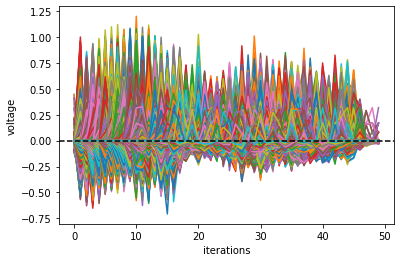

u-t plot layer3 (pooling layer): 


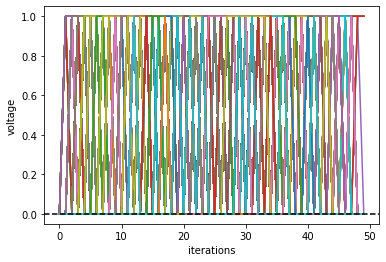

mean u-t plot layer2 (convolution layer): 


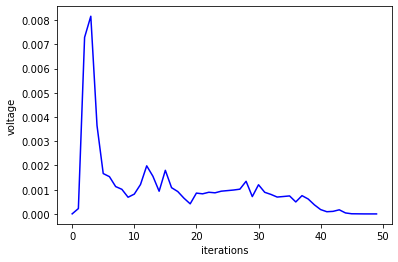

mean u-t plot layer3 (pooling layer): 


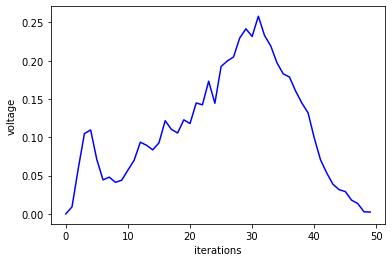

2D raster plot plot for layer1(input, blue) , layer2(convolution, orange) , layer3 (pooling, green): 


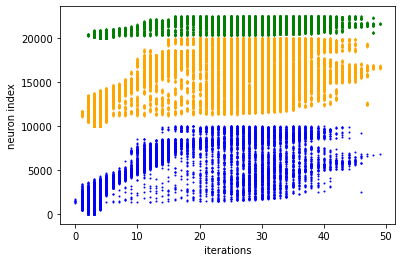

3D raster plot plot for layer1(input) : 


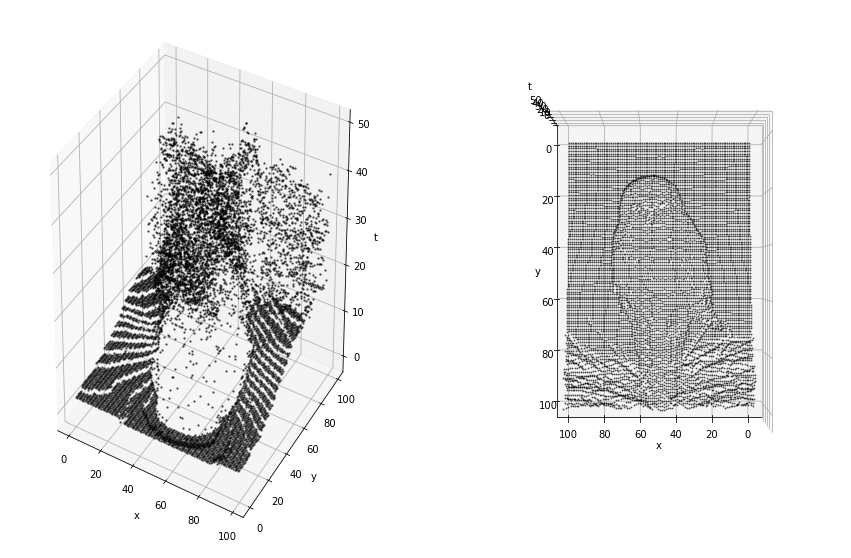

3D raster plot plot for layer2(convolution) : 


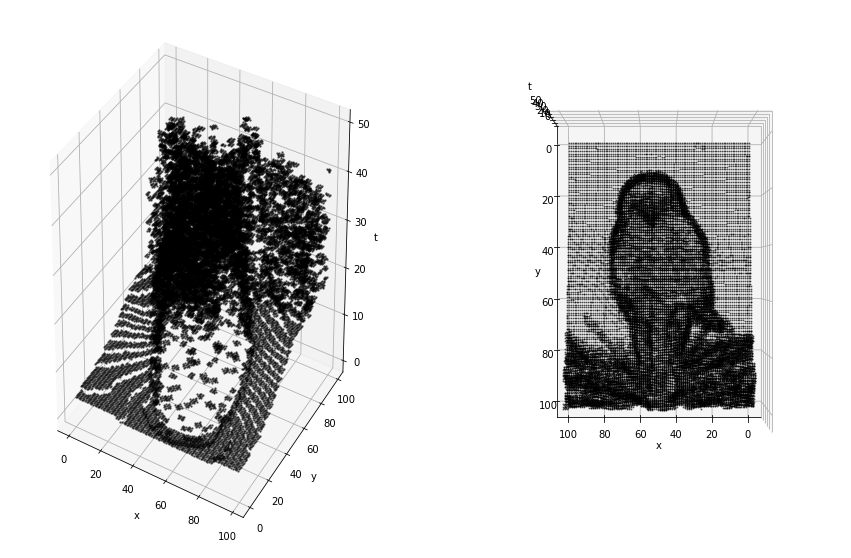

3D raster plot plot for layer3 (pooling): 


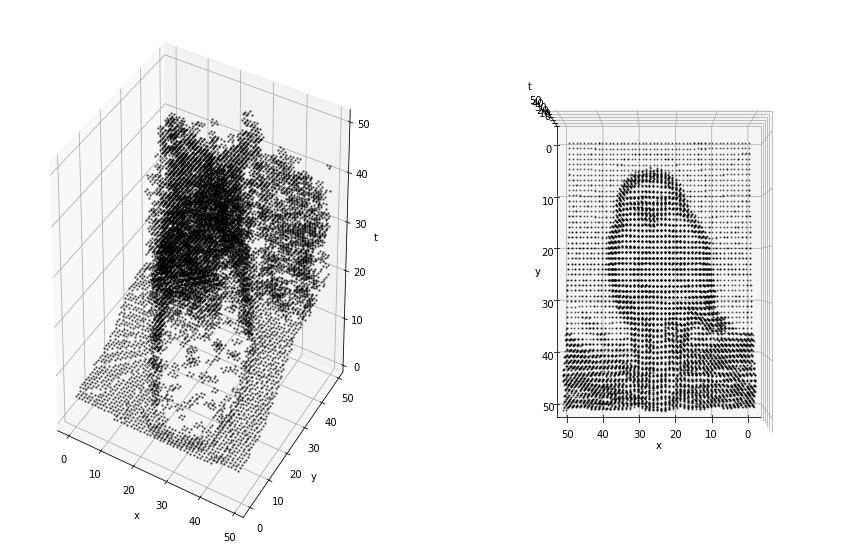

In [8]:
network_setup(param_set, par, img_tensor)

## Experiment 2
### kernel : DoG(std1 = 1 , std2 = 5 , filter_size = 15)  and pooling_size = 5

لایه اول و دوم عینا مشابه ازمایش قبلی است. تغیر مربوط به لایه اخر هست.
سایز لایه اخر را به یک پنجم لایه ورودی کاهش میدهم.
 اندازه پولینگ برابر 5 گرفتم
 به نسبت حالت قبلی جزییاتی که گرفته شده بود در لایه دوم از بین رفته ولی همین کلیاتی که نمایش داده و تقریبا برابر لایه ورودی هست را با اندازه ی بسیار کمتر ینمایش میدهد.

set network size to 100 x 100
set network size to 100 x 100
set network size to 20 x 20
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
50xBatch: 1/1 (100%) 17489.200ms
u-t plot layer2 (convolution layer): 


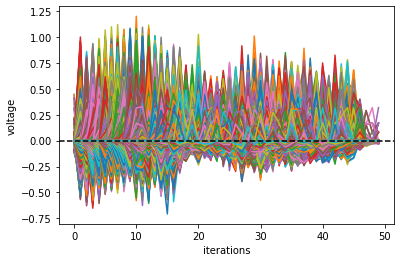

u-t plot layer3 (pooling layer): 


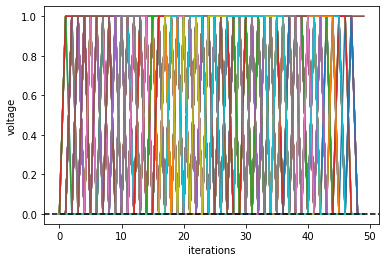

mean u-t plot layer2 (convolution layer): 


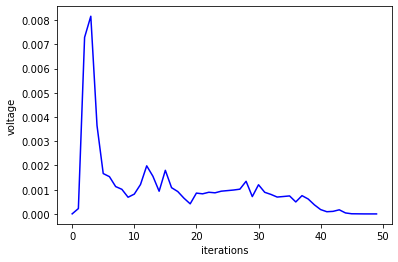

mean u-t plot layer3 (pooling layer): 


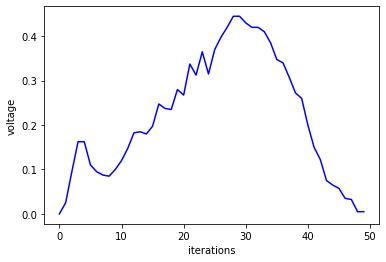

2D raster plot plot for layer1(input, blue) , layer2(convolution, orange) , layer3 (pooling, green): 


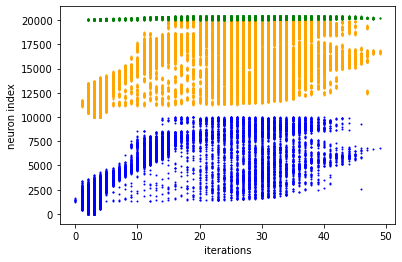

3D raster plot plot for layer1(input) : 


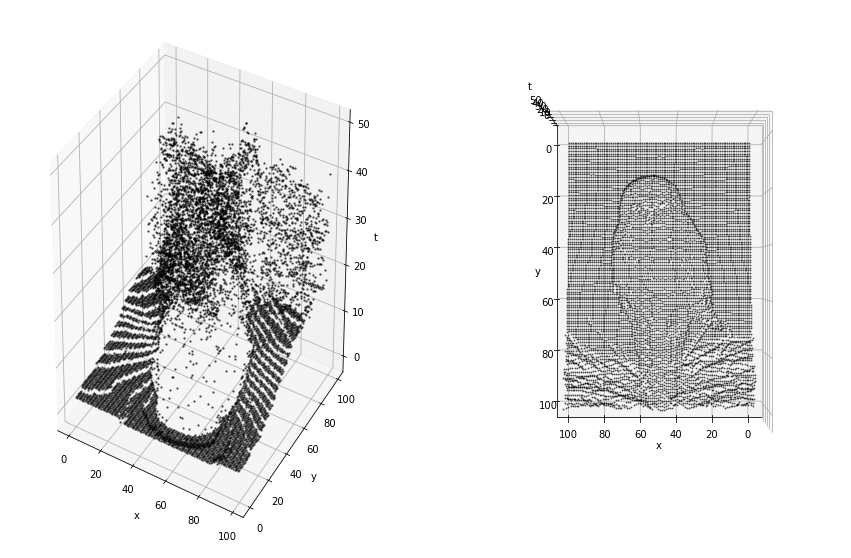

3D raster plot plot for layer2(convolution) : 


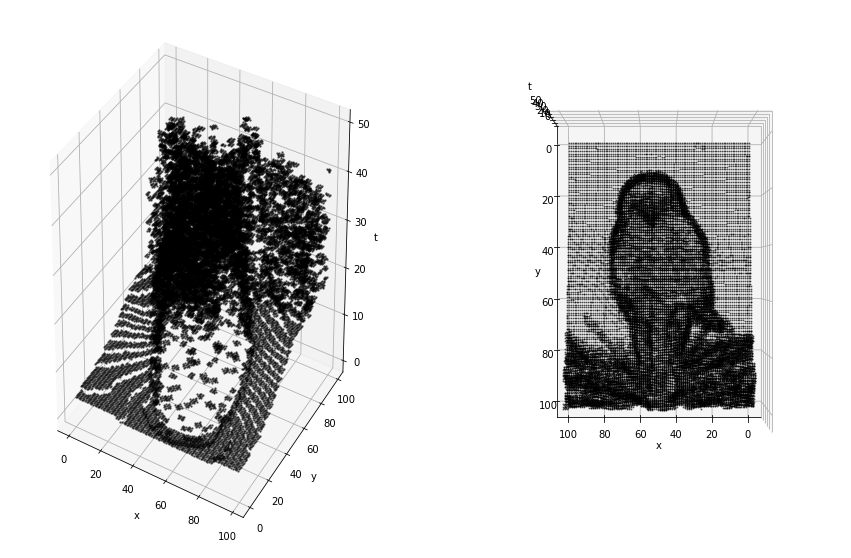

3D raster plot plot for layer3 (pooling): 


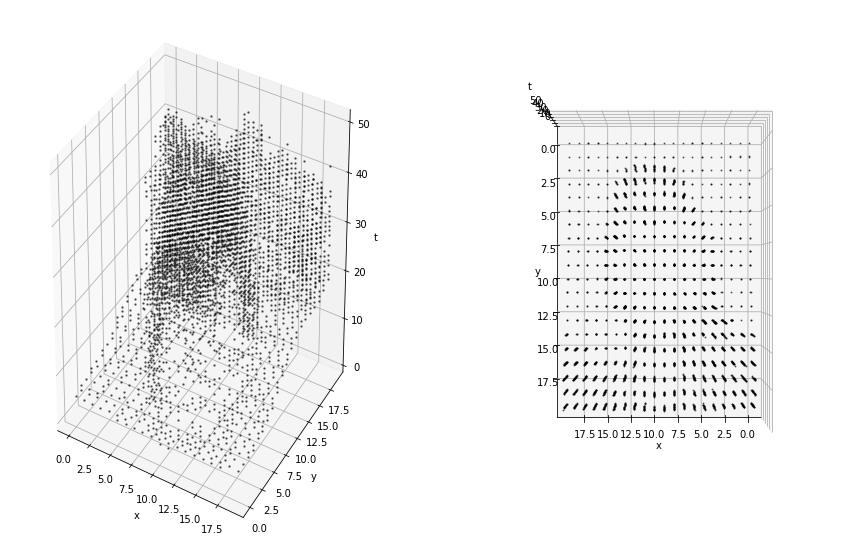

In [9]:
param_set['pooling_size'] =  5
param_set['layer3_size'] = img_dim//5
network_setup(param_set, par, img_tensor)

## Experiment 3
### kernel : Gabor(lambda = 3 , theta = 0 , sigma = 3 , gamma = 10 , filter_size = 15)  and pooling_size = 2

فیلتری که به عنوان کرنل استفاده شده 
gabor
هست که هدف اصلی ان شناسایی خطوط است. ظبق پارمترهای فیلتر قرار است جاهایی از تصویر را واضخ کند که خط عمودی وجود دارد.
اگر نتیجه ی لایه دوم کانولوشن را ببینیم مخضوضا در خالت سه بعدی سمت راست که زاویه گرفته کاملا خطوط تصویر گرفته شده.
این را با لایه اول ورودی مقایسه کنیم.
مخصوصا در بخش پایین تصویر که خطوط زیاد هست یا روی پرهای پرنده که خط خط هستند.
شدت جزییاتی که گرفته شده در لایه دوم بسیار واضح تر هستند.
نتیجه ی سه بعدی لایه سوم را نگاه کنیم.
به اینکه تصویر اط طول و عرض نصف شده ولی وضوح جزییاتی که توضیحش رفت همچنان حفظ شده.
روی نمودار رستر دوبعدی به تراکم اسپایک ها در لایه دوم و سوم نگاه کنیم.
نسبت به لایه اول شدت فعالیت بالاتر هست.

set network size to 100 x 100
set network size to 100 x 100
set network size to 50 x 50
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
50xBatch: 1/1 (100%) 20848.186ms
u-t plot layer2 (convolution layer): 


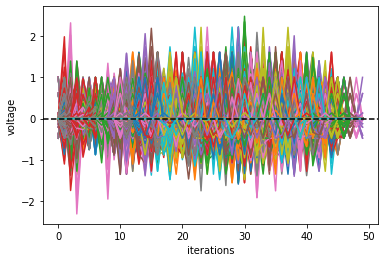

u-t plot layer3 (pooling layer): 


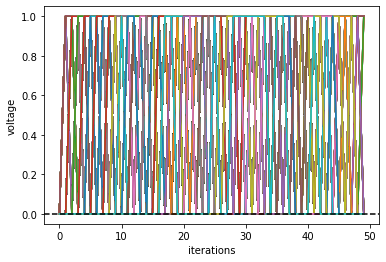

mean u-t plot layer2 (convolution layer): 


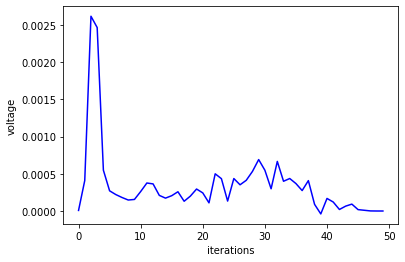

mean u-t plot layer3 (pooling layer): 


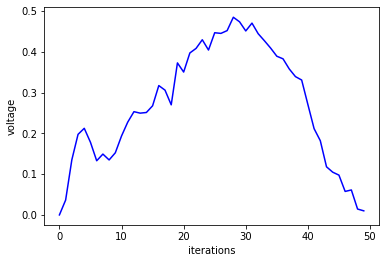

2D raster plot plot for layer1(input, blue) , layer2(convolution, orange) , layer3 (pooling, green): 


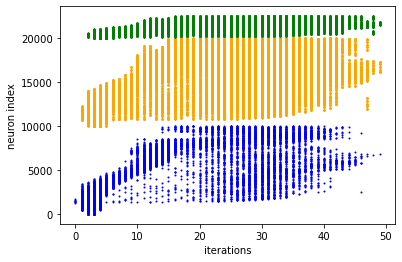

3D raster plot plot for layer1(input) : 


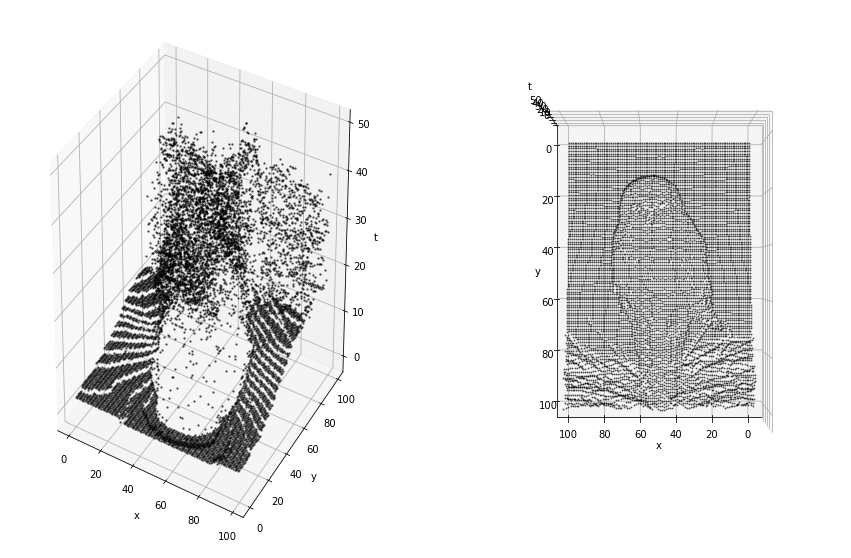

3D raster plot plot for layer2(convolution) : 


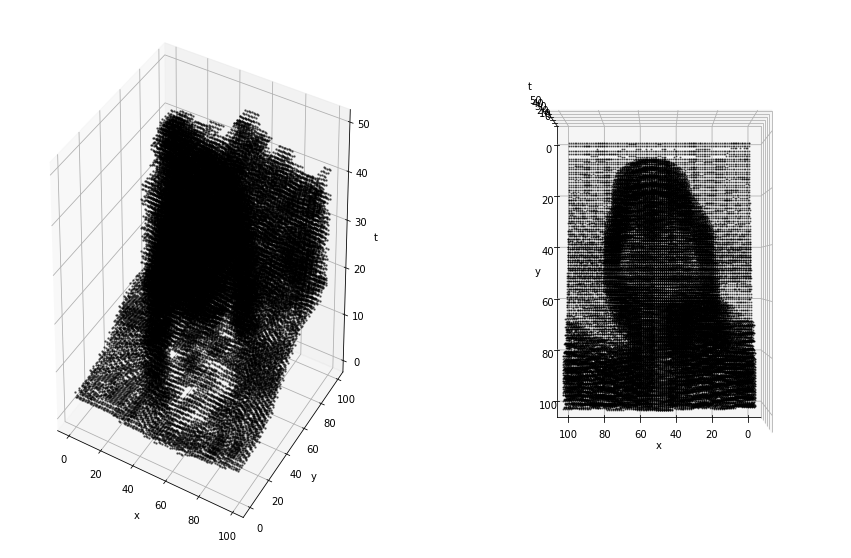

3D raster plot plot for layer3 (pooling): 


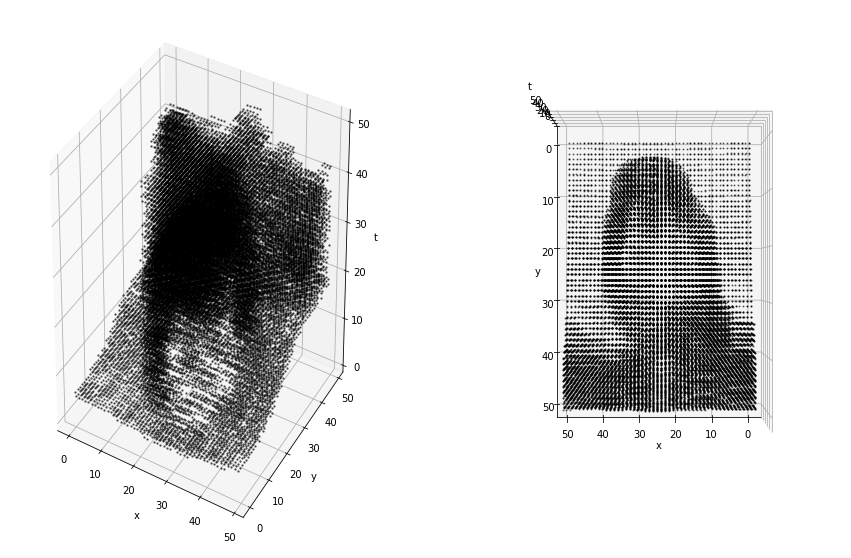

In [10]:
param_set['kernel'] = 'Gabor'
param_set['pooling_size'] = 2
param_set['layer3_size'] = img_dim//2
network_setup(param_set, par, img_tensor)

## Experiment 4
### kernel : Gabor(lambda = 3 , theta = 0 , sigma = 3 , gamma = 10 , filter_size = 15)  and pooling_size = 5

نتیجه ی ازمایش قبلی با لایه سوم متفاوت. این بار به جای اندازه ی 2 بای پولینگ از 5 استفاده کزدم.
روی نمودارهای سه بعدی سوم نگاه کنیم.
روی فیلتر قبلی این اندازه جرییات از دست نرفته بود. تاثیر کاهش شدید اندازه ی تصویر روی فیلتر 
gabor
شدید تر است.
روی رستر دوبعدی لایه سبز را با ازمایش 3 مقایسه کنیم
تقریبا فعالیت یکنواحت شده و همین نشان میدهد که چقدر از جزییات از دست میرود.

set network size to 100 x 100
set network size to 100 x 100
set network size to 20 x 20
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
init v_rest
init v_reset
init v_threshold
init pooling_size
init padding
50xBatch: 1/1 (100%) 16100.904ms
u-t plot layer2 (convolution layer): 


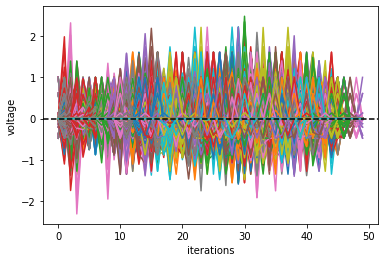

u-t plot layer3 (pooling layer): 


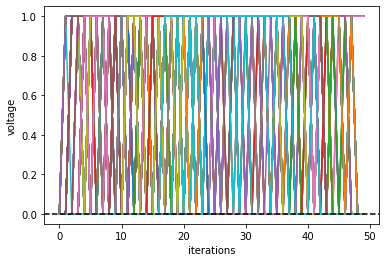

mean u-t plot layer2 (convolution layer): 


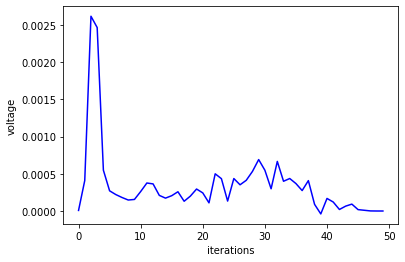

mean u-t plot layer3 (pooling layer): 


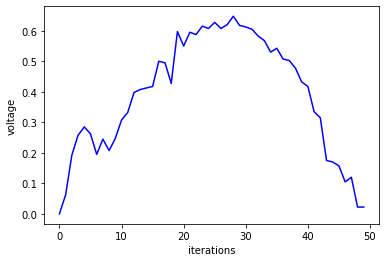

2D raster plot plot for layer1(input, blue) , layer2(convolution, orange) , layer3 (pooling, green): 


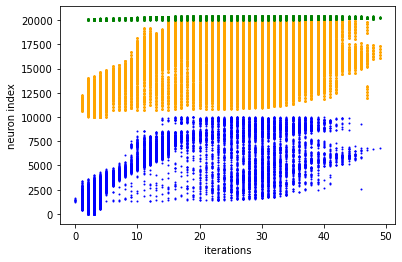

3D raster plot plot for layer1(input) : 


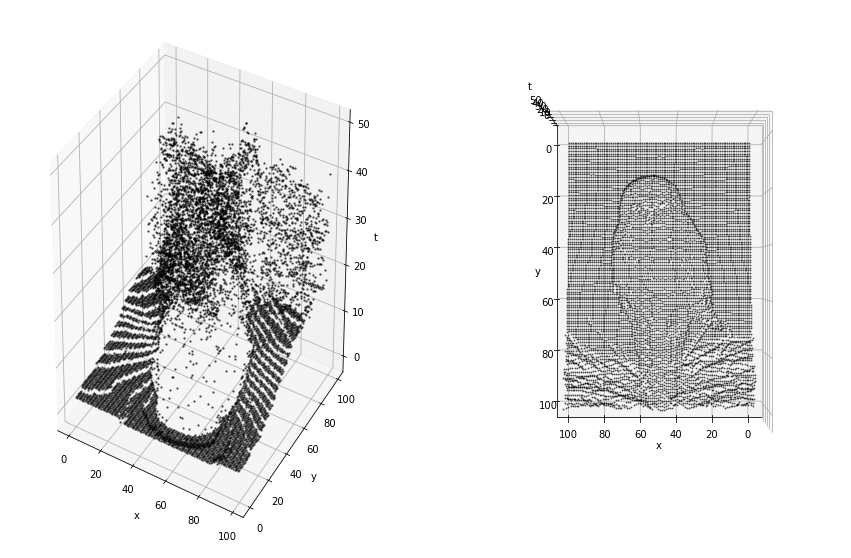

3D raster plot plot for layer2(convolution) : 


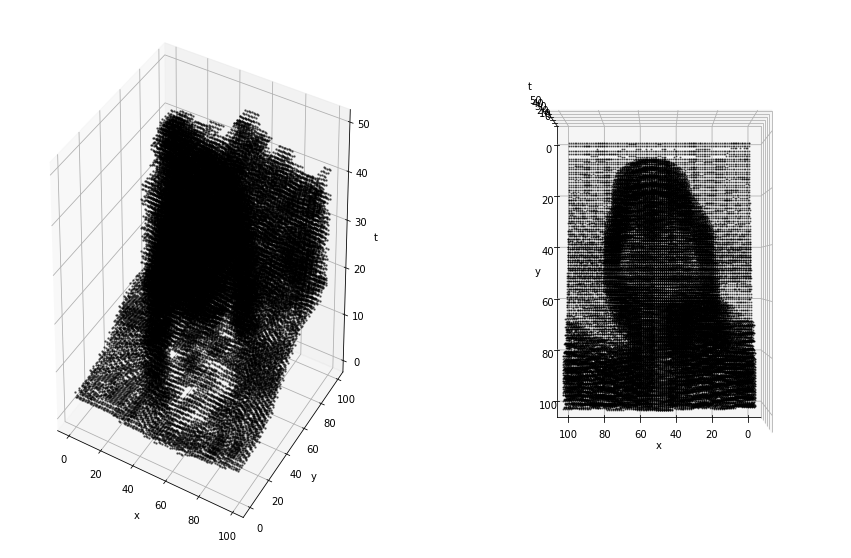

3D raster plot plot for layer3 (pooling): 


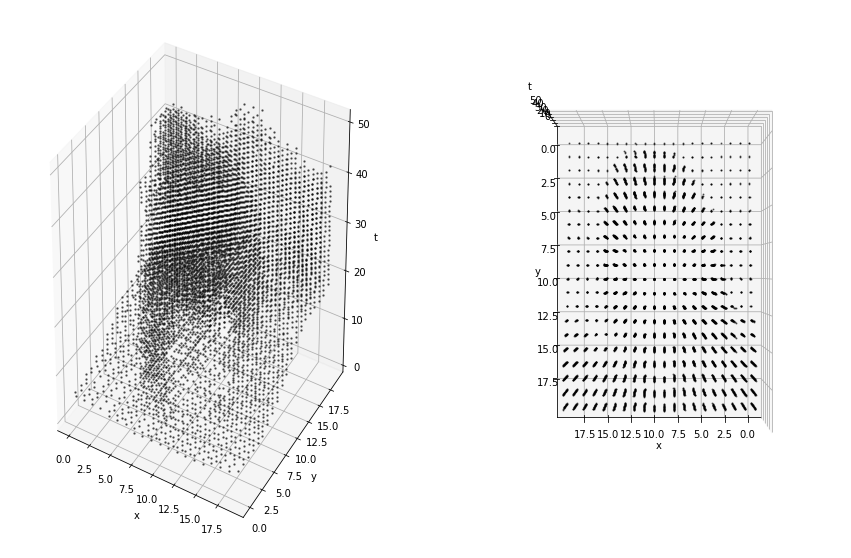

In [11]:
param_set['pooling_size'] = 5
param_set['layer3_size'] = img_dim//5
network_setup(param_set, par, img_tensor)

در این آزمایش ها با پارامترهایی که تست شد برای تصویر استفاده شده برای اندازه ی پولینگ 2 برای فیلتر 
gabor
به عنوان کرنل مناسب بود.
برای فیلتر 
dog
از اندازه های بیشتر از 2 میتوان استفاده کرد ولی 5 زیاد است.
در هر دو فیلتر لایه کانولوشن با این فیلترها عملکرد بسیارر خوبی در نمایش جزییات تصویر نشان داده.
